In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as py

C:\Users\hp\AppData\Local\Temp\ipykernel_2056\1986388851.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_excel(r"C:/Users/hp/Downloads/P1-SuperStoreUS-2015.xlsx")

In [3]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

# Checking Null and Duplicate Values

In [5]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [34]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4164\747766094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)


# Order Priority

In [11]:
df['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [4]:
df['Order Priority'].nunique()

6

In [6]:
df['Order Priority']=df['Order Priority'].replace('Critical ','Critical')

In [7]:
df['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         391
Medium           376
Name: count, dtype: int64

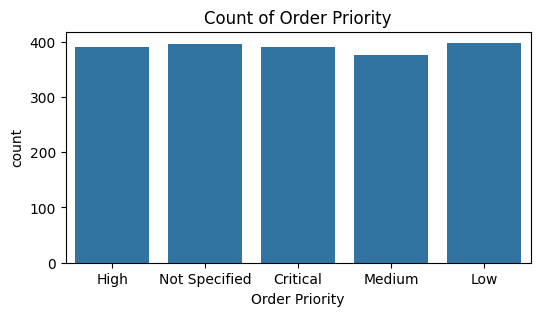

In [8]:
plt.figure(figsize=(6,3))
sns.countplot(x='Order Priority', data=df)
plt.title("Count of Order Priority")
plt.show()

# Ship Mode

In [3]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [8]:

x= df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

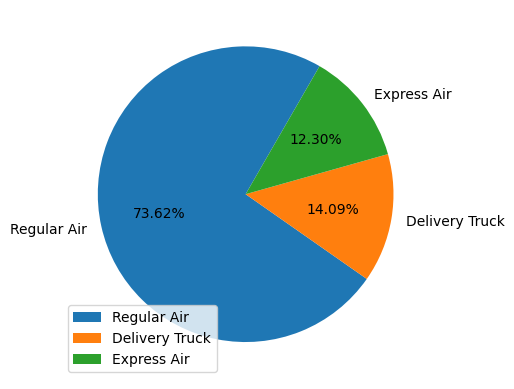

In [20]:
plt.pie(y, startangle=60, autopct="%0.2f%%", labels= x)
plt.legend()
plt.show()

# Customer Segment

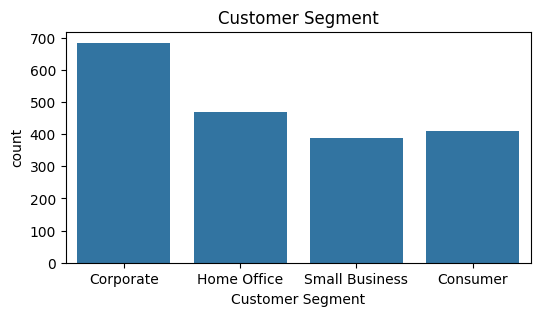

In [15]:
plt.figure(figsize=(6,3))
sns.countplot(x='Customer Segment', data=df)
plt.title("Customer Segment")
plt.show()

# Product Category

In [18]:
df['Product Category'].value_counts()

Product Category
Office Supplies    1071
Technology          481
Furniture           400
Name: count, dtype: int64

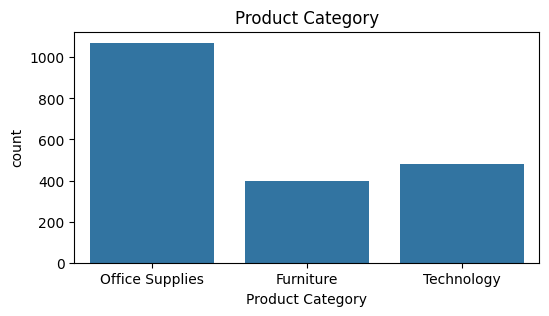

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x='Product Category', data=df)
plt.title("Product Category")
plt.show()

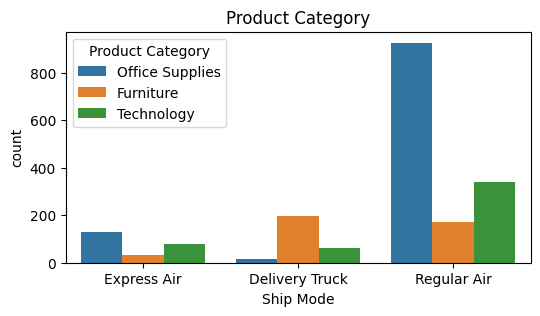

In [21]:
plt.figure(figsize=(6,3))
sns.countplot(x='Ship Mode', data=df, hue="Product Category")
plt.title("Product Category")
plt.show()

# Order Date

In [25]:
df['Order year']=df['Order Date'].dt.year

In [26]:
df['Order year'].value_counts()

Order year
2015    1952
Name: count, dtype: int64

# Profit

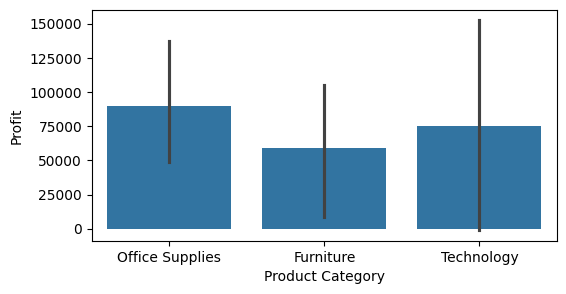

In [36]:
plt.figure(figsize=(6,3))
sns.barplot(x="Product Category", y="Profit", data=df, estimator="sum")
plt.show()

# State or Province

In [30]:
df['State or Province'].value_counts()[:5]

State or Province
California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: count, dtype: int64

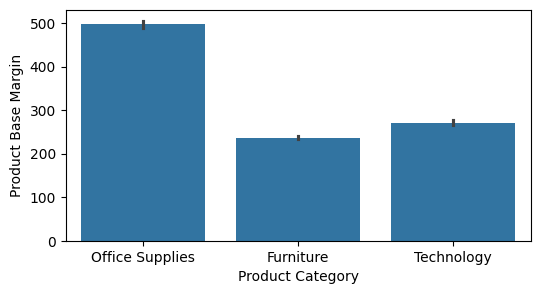

In [37]:
plt.figure(figsize=(6,3))
sns.barplot(x="Product Category", y="Product Base Margin", data=df, estimator="sum")
plt.show()

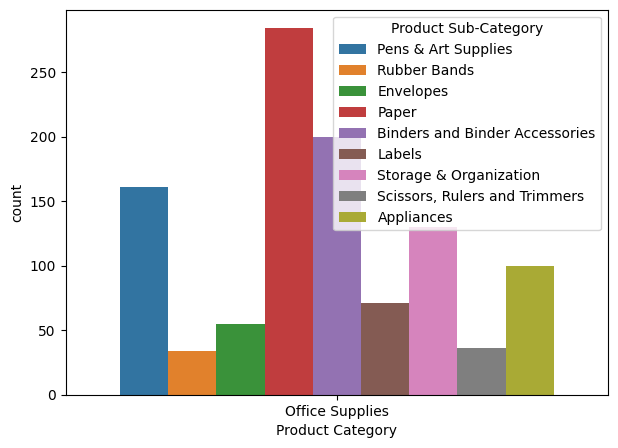

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Office Supplies'], hue='Product Sub-Category')
plt.show()

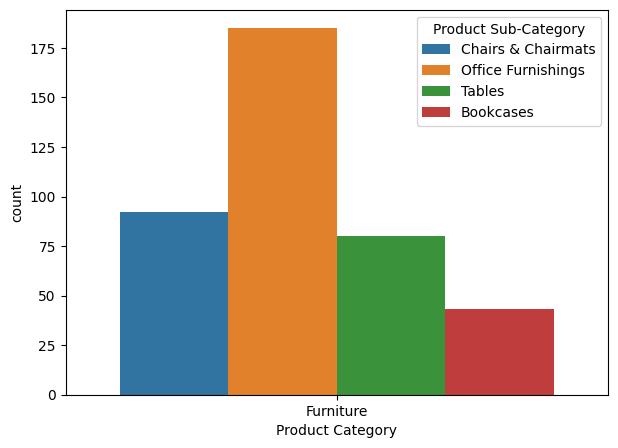

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Furniture'], hue='Product Sub-Category')
plt.show()

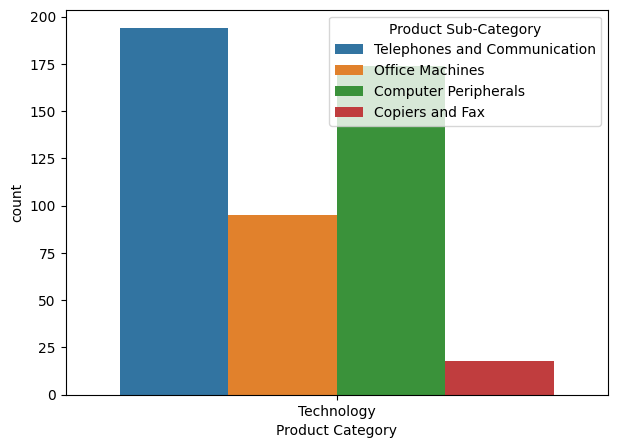

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Technology'], hue='Product Sub-Category')
plt.show()